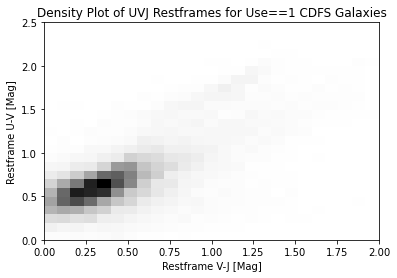

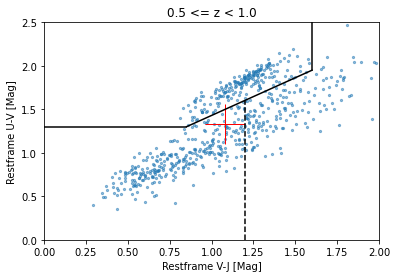

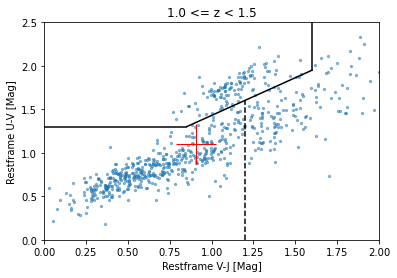

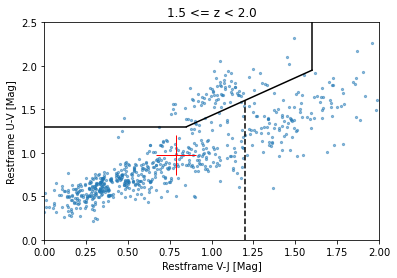

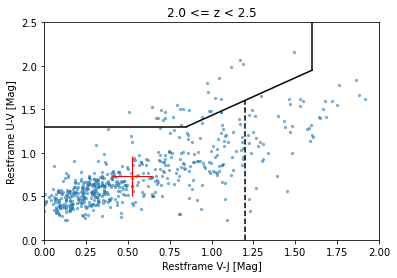

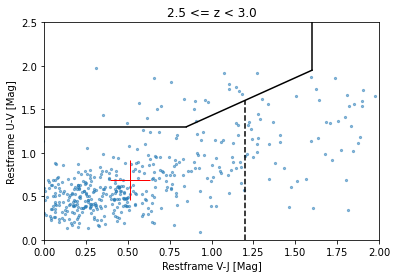

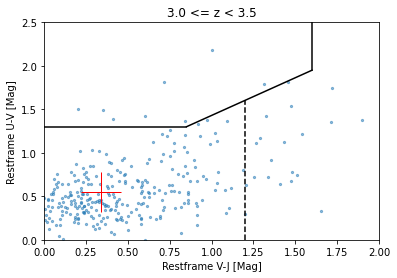

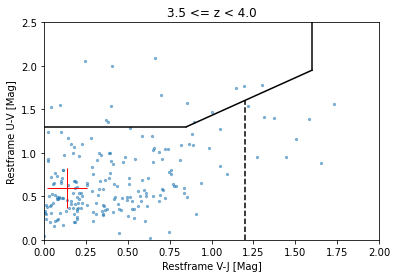

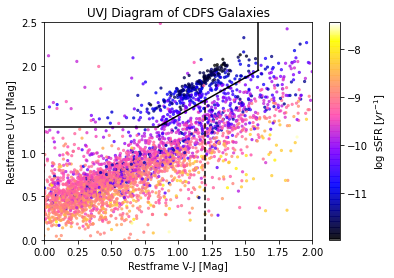

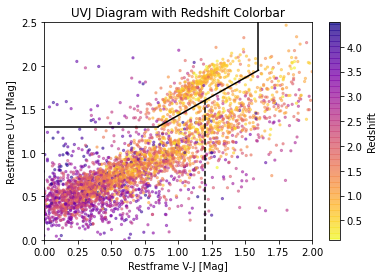

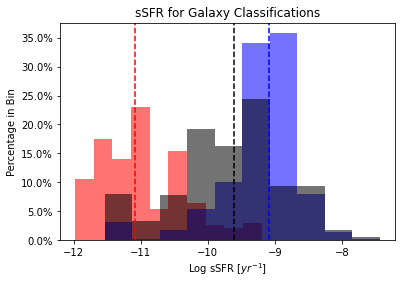

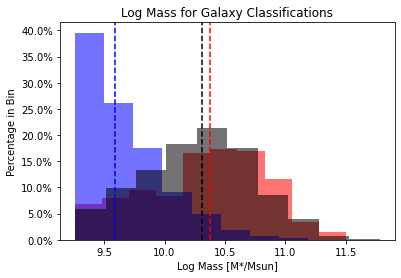

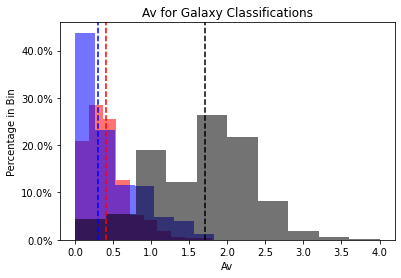

In [4]:
##### PVB304 EMMA READ PYTHON CODE #####

# Load in required packages
import numpy as np
import warnings
warnings.simplefilter("ignore", RuntimeWarning)
import matplotlib.pyplot as plt
%matplotlib inline
import statistics
import math
from matplotlib.ticker import PercentFormatter

# Import required data sets
rest_cdfs = np.genfromtxt('restframe.tsv', delimiter='\t') #ID, REST FRAME U, REST FRAME V, REST FRAME J 
cdfs_photometric = np.genfromtxt('photometric.tsv', delimiter="\t") #ID, USE FLAG
cdfs_mass = np.genfromtxt('logstellarmass.tsv', delimiter="\t") #ID, LOGMASS
cdfs_redshift = np.genfromtxt('cdfs_redshift.tsv', delimiter="\t") #ID, PHOTOPEAK
ssfr = np.genfromtxt('sSFR.tsv', delimiter="\t") #ID, SSFR
av = np.genfromtxt('av.tsv', delimiter="\t") #ID, AV

# Create U, V, J Rest Frame Arrays -> only filtered by use flag
flag1_id = []
flag1_u = []
flag1_v = []
flag1_j = []

for i in cdfs_photometric:
    if i[-3] == 1:
        flag1_id.append(i[0])
    else:
        pass
    
for i in rest_cdfs:
    if i[0] in flag1_id:
        flag1_u.append(i[1])
        flag1_v.append(i[2])
        flag1_j.append(i[3])
    else:
        pass

u_cdfs = 25. - 2.5 * np.log10(flag1_u)
v_cdfs = 25. - 2.5 * np.log10(flag1_v)
j_cdfs = 25. - 2.5 * np.log10(flag1_j)

uv_cdfs = u_cdfs - v_cdfs
vj_cdfs = v_cdfs - j_cdfs

# Create Density Plot using above data
XRANGE = [0, 2]
YRANGE = [0, 2.5]

Bins = 25
hist2D, xedges, yedges = np.histogram2d(vj_cdfs, uv_cdfs, bins=[Bins,Bins], range=[XRANGE,YRANGE],
    normed=False)

hist2D = np.transpose(hist2D)  # Beware: numpy switches axes, so switch back.
plt.pcolormesh(xedges, yedges, hist2D, cmap=plt.cm.Greys)
plt.xlabel('Restframe V-J [Mag]')
plt.ylabel('Restframe U-V [Mag]')
plt.title('Density Plot of UVJ Restframes for Use==1 CDFS Galaxies')
plt.show()

# Make Mass Cut at 9.25
mass = []
for i in cdfs_mass:
    if i[1] > 9.25:
        mass.append(i[0])
    else:
        pass 
    
# Sort data into Redshift Bins
bin1 = [] #z = 0.5 - 1
bin2 = [] #z = 1 - 1.5
bin3 = [] #z = 1.5 - 2
bin4 = [] #z = 2 - 2.5
bin5 = [] #z = 2.5 - 3
bin6 = [] #z = 3 - 3.5
bin7 = [] #z = 3.5 - 4

for i in cdfs_redshift:
    if i[0] in flag1_id and i[0] in mass:
        if 0.5 <= i[1] < 1:
            bin1.append(i[0])
        elif 1 <= i[1] < 1.5:
            bin2.append(i[0])
        elif 1.5 <= i[1] < 2:
            bin3.append(i[0])
        elif 2 <= i[1] < 2.5:
            bin4.append(i[0])
        elif 2.5 <= i[1] < 3:
            bin5.append(i[0])
        elif 3 <= i[1] < 3.5:
            bin6.append(i[0])
        elif 3.5 <= i[1] < 4:
            bin7.append(i[0])
        else:
            pass
    else:
        pass

bin1_u = []
bin1_v = []
bin1_j = []
bin2_u = []
bin2_v = []
bin2_j = []
bin3_u = []
bin3_v = []
bin3_j = []
bin4_u = []
bin4_v = []
bin4_j = []
bin5_u = []
bin5_v = []
bin5_j = []
bin6_u = []
bin6_v = []
bin6_j = []
bin7_u = []
bin7_v = []
bin7_j = []

# Create uvj values for each bin
for i in rest_cdfs:
    if i[0] in bin1:
        bin1_u.append(i[1])
        bin1_v.append(i[2])
        bin1_j.append(i[3])
    elif i[0] in bin2:
        bin2_u.append(i[1])
        bin2_v.append(i[2])
        bin2_j.append(i[3])
    elif i[0] in bin3:
        bin3_u.append(i[1])
        bin3_v.append(i[2])
        bin3_j.append(i[3])
    elif i[0] in bin4:
        bin4_u.append(i[1])
        bin4_v.append(i[2])
        bin4_j.append(i[3])
    elif i[0] in bin5:
        bin5_u.append(i[1])
        bin5_v.append(i[2])
        bin5_j.append(i[3])
    elif i[0] in bin6:
        bin6_u.append(i[1])
        bin6_v.append(i[2])
        bin6_j.append(i[3])
    elif i[0] in bin7:
        bin7_u.append(i[1])
        bin7_v.append(i[2])
        bin7_j.append(i[3])
    else:
        pass

u1 = 25. - 2.5 * np.log10(bin1_u)
v1 = 25. - 2.5 * np.log10(bin1_v)
j1 = 25. - 2.5 * np.log10(bin1_j)
uv1 = u1 - v1
vj1 = v1 - j1

u2 = 25. - 2.5 * np.log10(bin2_u)
v2 = 25. - 2.5 * np.log10(bin2_v)
j2 = 25. - 2.5 * np.log10(bin2_j)
uv2 = u2 - v2
vj2 = v2 - j2

u3 = 25. - 2.5 * np.log10(bin3_u)
v3 = 25. - 2.5 * np.log10(bin3_v)
j3 = 25. - 2.5 * np.log10(bin3_j)
uv3 = u3 - v3
vj3 = v3 - j3

u4 = 25. - 2.5 * np.log10(bin4_u)
v4 = 25. - 2.5 * np.log10(bin4_v)
j4 = 25. - 2.5 * np.log10(bin4_j)
uv4 = u4 - v4
vj4 = v4 - j4

u5 = 25. - 2.5 * np.log10(bin5_u)
v5 = 25. - 2.5 * np.log10(bin5_v)
j5 = 25. - 2.5 * np.log10(bin5_j)
uv5 = u5 - v5
vj5 = v5 - j5

u6 = 25. - 2.5 * np.log10(bin6_u)
v6 = 25. - 2.5 * np.log10(bin6_v)
j6 = 25. - 2.5 * np.log10(bin6_j)
uv6 = u6 - v6
vj6 = v6 - j6

u7 = 25. - 2.5 * np.log10(bin7_u)
v7 = 25. - 2.5 * np.log10(bin7_v)
j7 = 25. - 2.5 * np.log10(bin7_j)
uv7 = u7 - v7
vj7 = v7 - j7

# Create 7 different scatterplots for each of the redshift bins. Include the mean UV and VJ as a red crosshair
    # Bin 1
mean_uv1 = sum(uv1)/len(uv1)
mean_vj1 = sum(vj1)/len(vj1)

plt.scatter(vj1, uv1, marker = '.', s = 20, alpha = 0.5)
plt.plot(mean_vj1, mean_uv1, 'r+', markersize=40)
plt.plot([0, 0.85], [1.3, 1.3], 'k-')
plt.plot([0.85, 1.6], [1.3, 1.95], 'k-')
plt.plot([1.6, 1.6], [1.95, 2.5], 'k-')
plt.plot([1.2, 1.2], [0, 481/300], 'k--')
plt.xlim([0, 2])
plt.ylim([0, 2.5])
plt.xlabel('Restframe V-J [Mag]')
plt.ylabel('Restframe U-V [Mag]')
plt.title('0.5 <= z < 1.0')
plt.show()
    
    # Bin 2
mean_uv2 = sum(uv2)/len(uv2)
mean_vj2 = sum(vj2)/len(vj2)

plt.scatter(vj2, uv2, marker = '.', s = 20, alpha = 0.5)
plt.plot(mean_vj2, mean_uv2, 'r+', markersize=40)
plt.plot([0, 0.85], [1.3, 1.3], 'k-')
plt.plot([0.85, 1.6], [1.3, 1.95], 'k-')
plt.plot([1.6, 1.6], [1.95, 2.5], 'k-')
plt.plot([1.2, 1.2], [0, 481/300], 'k--')
plt.xlim([0, 2])
plt.ylim([0, 2.5])
plt.xlabel('Restframe V-J [Mag]')
plt.ylabel('Restframe U-V [Mag]')
plt.title('1.0 <= z < 1.5')
plt.show()
        
    # Bin 3
mean_uv3 = sum(uv3)/len(uv3)
mean_vj3 = sum(vj3)/len(vj3)

plt.scatter(vj3, uv3, marker = '.', s = 20, alpha = 0.5)
plt.plot(mean_vj3, mean_uv3, 'r+', markersize=40)
plt.plot([0, 0.85], [1.3, 1.3], 'k-')
plt.plot([0.85, 1.6], [1.3, 1.95], 'k-')
plt.plot([1.6, 1.6], [1.95, 2.5], 'k-')
plt.plot([1.2, 1.2], [0, 481/300], 'k--')
plt.xlim([0, 2])
plt.ylim([0, 2.5])
plt.xlabel('Restframe V-J [Mag]')
plt.ylabel('Restframe U-V [Mag]')
plt.title('1.5 <= z < 2.0')
plt.show()
          
    # Bin 4
mean_uv4 = sum(uv4)/len(uv4)
mean_vj4 = sum(vj4)/len(vj4)

plt.scatter(vj4, uv4, marker = '.', s = 20, alpha = 0.5)
plt.plot(mean_vj4, mean_uv4, 'r+', markersize=40)
plt.plot([0, 0.85], [1.3, 1.3], 'k-')
plt.plot([0.85, 1.6], [1.3, 1.95], 'k-')
plt.plot([1.6, 1.6], [1.95, 2.5], 'k-')
plt.plot([1.2, 1.2], [0, 481/300], 'k--')
plt.xlim([0, 2])
plt.ylim([0, 2.5])
plt.xlabel('Restframe V-J [Mag]')
plt.ylabel('Restframe U-V [Mag]')
plt.title('2.0 <= z < 2.5')
plt.show()

    # Bin 5
mean_uv5 = sum(uv5)/len(uv5)
mean_vj5 = sum(vj5)/len(vj5)

plt.scatter(vj5, uv5, marker = '.', s = 20, alpha = 0.5)
plt.plot(mean_vj5, mean_uv5, 'r+', markersize=40)
plt.plot([0, 0.85], [1.3, 1.3], 'k-')
plt.plot([0.85, 1.6], [1.3, 1.95], 'k-')
plt.plot([1.6, 1.6], [1.95, 2.5], 'k-')
plt.plot([1.2, 1.2], [0, 481/300], 'k--')
plt.xlim([0, 2])
plt.ylim([0, 2.5])
plt.xlabel('Restframe V-J [Mag]')
plt.ylabel('Restframe U-V [Mag]')
plt.title('2.5 <= z < 3.0')
plt.show()

    # Bin 6
mean_uv6 = sum(uv6)/len(uv6)
mean_vj6 = sum(vj6)/len(vj6)

plt.scatter(vj6, uv6, marker = '.', s = 20, alpha = 0.5)
plt.plot(mean_vj6, mean_uv6, 'r+', markersize=40)
plt.plot([0, 0.85], [1.3, 1.3], 'k-')
plt.plot([0.85, 1.6], [1.3, 1.95], 'k-')
plt.plot([1.6, 1.6], [1.95, 2.5], 'k-')
plt.plot([1.2, 1.2], [0, 481/300], 'k--')
plt.xlim([0, 2])
plt.ylim([0, 2.5])
plt.xlabel('Restframe V-J [Mag]')
plt.ylabel('Restframe U-V [Mag]')
plt.title('3.0 <= z < 3.5')
plt.show()

    # Bin 7
mean_uv7 = sum(uv7)/len(uv7)
mean_vj7 = sum(vj7)/len(vj7)

plt.scatter(vj7, uv7, marker = '.', s = 20, alpha = 0.5)
plt.plot(mean_vj7, mean_uv7, 'r+', markersize=40)
plt.plot([0, 0.85], [1.3, 1.3], 'k-')
plt.plot([0.85, 1.6], [1.3, 1.95], 'k-')
plt.plot([1.6, 1.6], [1.95, 2.5], 'k-')
plt.plot([1.2, 1.2], [0, 481/300], 'k--')
plt.xlim([0, 2])
plt.ylim([0, 2.5])
plt.xlabel('Restframe V-J [Mag]')
plt.ylabel('Restframe U-V [Mag]')
plt.title('3.5 <= z < 4.0')
plt.show()

# Create an array called "galaxies" with the id values for the 4477 galaxies above the mass limit and use=1
galaxies = []
for i in cdfs_redshift:
    if i[0] in flag1_id and i[0] in mass:
        galaxies.append(i[0])
    else:
        pass

# Create U, V, J values for galaxies in the array
u_gal = []
v_gal = []
j_gal = []
     
for i in rest_cdfs:
    if i[0] in galaxies:
        u_gal.append(i[1])
        v_gal.append(i[2])
        j_gal.append(i[3])
    else:
        pass

cdfs_u = 25. - 2.5 * np.log10(u_gal)
cdfs_v = 25. - 2.5 * np.log10(v_gal)
cdfs_j = 25. - 2.5 * np.log10(j_gal)

cdfs_uv = cdfs_u - cdfs_v
cdfs_vj = cdfs_v - cdfs_j

# Classify the galaxies as quiescent, star forming or dusty star forming based on geometry of UVJ plot
def uvj_single(vj, uv):
    global colour
    x1 = 0.85
    x2 = 1.6
    y1 = 1.3
    y2 = 1.95
    m = (y1-y2)/(x1-x2)
    c = y1 - m*x1
    is_star_forming = 1
    
    if 0 < vj <= 0.85 and 1.3 < uv < 2.5:
        is_star_forming = 0
    if 0.85 < vj < 1.6 and (vj * m + c) < uv < 2.5:
        is_star_forming = 0
    if is_star_forming == 0:
        colour = 1 # Quiescent
    elif is_star_forming == 1 and vj <= 1.2:
        colour = 2 # Star Forming
    elif is_star_forming == 1 and vj > 1.2:
        colour = 3 # Dusty Star Forming
    return colour

def uvj_array(vj, uv):
    uvj = []
    for i, j in zip(vj, uv):
        z = uvj_single(i,j)
        uvj.append(z)
    return uvj

galaxy_class = uvj_array(cdfs_vj, cdfs_uv) # Create classification array

# Create UVJ plot with sSFR colorbar
cdfs_ssfr = []

for i in ssfr:
    if i[0] in galaxies:
        cdfs_ssfr.append(i[1])
    else:
        pass
    
ssfr_matrix = np.column_stack((cdfs_vj, cdfs_uv, cdfs_ssfr))
ssfr_cut = []
vj_cut = []
uv_cut = []

for i,j,k in ssfr_matrix:
    if k >= -12: #make a cut at -12
        ssfr_cut.append(k)
        vj_cut.append(i)
        uv_cut.append(j)
    else:
        pass
        
plt.scatter(vj_cut, uv_cut, marker = '.', s = 20, 
            alpha = 0.7, c = ssfr_cut, cmap = 'gnuplot2')
plt.colorbar(label = 'log sSFR [$yr^{-1}$]')
plt.plot([0, 0.85], [1.3, 1.3], 'k-')
plt.plot([0.85, 1.6], [1.3, 1.95], 'k-')
plt.plot([1.6, 1.6], [1.95, 2.5], 'k-')
plt.plot([1.2, 1.2], [0, 481/300], 'k--')
plt.xlim([0, 2])
plt.ylim([0, 2.5])
plt.xlabel('Restframe V-J [Mag]')
plt.ylabel('Restframe U-V [Mag]')
plt.title('UVJ Diagram of CDFS Galaxies')
plt.show()

# Create UVJ plot with redshift colorbar
cdfs_z = []

for i in cdfs_redshift:
    if i[0] in flag1_id and i[0] in mass:
        cdfs_z.append(i[1])
    else:
        pass

redshift_matrix = np.column_stack((cdfs_vj, cdfs_uv, cdfs_z))

trunc_cdfs_vj = []
trunc_cdfs_uv = []
trunc_cdfs_z = []

for i,j,k in redshift_matrix:
    if k <= 4.5: #cut redshift at z=4.5
        trunc_cdfs_vj.append(i)
        trunc_cdfs_uv.append(j)
        trunc_cdfs_z.append(k)
    else:
        pass
    
plt.scatter(trunc_cdfs_vj, trunc_cdfs_uv, marker = '.', 
            c = trunc_cdfs_z , s = 20, alpha = 0.5, cmap = 'plasma_r')
plt.colorbar(label = 'Redshift')
plt.plot([0, 0.85], [1.3, 1.3], 'k-')
plt.plot([0.85, 1.6], [1.3, 1.95], 'k-')
plt.plot([1.6, 1.6], [1.95, 2.5], 'k-')
plt.plot([1.2, 1.2], [0, 481/300], 'k--')
plt.xlim([0, 2])
plt.ylim([0, 2.5])
plt.xlabel('Restframe V-J [Mag]')
plt.ylabel('Restframe U-V [Mag]')
plt.title('UVJ Diagram with Redshift Colorbar')
plt.show()

# Create histogram of classified galaxies by sSFR
class_matrix = np.column_stack((galaxies, galaxy_class))

q_id = [] #quiescent
sf_id = [] #star forming
dsf_id = [] #dusty star forming

for i,j in class_matrix:
    if j == 1:
        q_id.append(i)
    elif j == 2:
        sf_id.append(i)
    else:
        dsf_id.append(i)

q_ssfr = []
sf_ssfr = []
dsf_ssfr = []

for i in ssfr:
    
    if i[0] in galaxies:
        if math.isnan(i[1]):
            pass
        else:
            if i[1] <= -12: #impose sSFR limit
                pass
            else:
                if i[0] in q_id:
                    q_ssfr.append(i[1])
                elif i[0] in sf_id:
                    sf_ssfr.append(i[1])
                elif i[0] in dsf_id:
                    dsf_ssfr.append(i[1])
                else:
                    pass
    else:
        pass

q_ssfr_med = statistics.median(q_ssfr)
sf_ssfr_med = statistics.median(sf_ssfr)
dsf_ssfr_med = statistics.median(dsf_ssfr)

plt.hist(q_ssfr, weights = np.ones(len(q_ssfr))/len(q_ssfr), alpha = 0.55, color = 'r', label = 'Quiescent')
plt.hist(sf_ssfr, weights = np.ones(len(sf_ssfr))/len(sf_ssfr), alpha = 0.55, color = 'b', label = 'Star Forming')
plt.hist(dsf_ssfr, weights = np.ones(len(dsf_ssfr))/len(dsf_ssfr), alpha = 0.55, color = 'k', label = 'Dusty Star Forming')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.axvline(x = q_ssfr_med, color = 'r', linestyle = 'dashed', label = 'Quiescent Median')
plt.axvline(x = sf_ssfr_med, color = 'b', linestyle = 'dashed', label = 'Star Forming Median')
plt.axvline(x = dsf_ssfr_med, color = 'k', linestyle = 'dashed', label = 'Dusty Star Forming Median')
plt.xlabel('Log sSFR [$yr^{-1}$]')
plt.ylabel('Percentage in Bin')
plt.title('sSFR for Galaxy Classifications')
plt.show()

# Create histogram of classified galaxies by mass
q_logmass = []
sf_logmass = []
dsf_logmass = []

for i in cdfs_mass:
    if i[0] in galaxies:
        if math.isnan(i[1]):
            pass
        else:
            if i[0] in q_id:
                q_logmass.append(i[1])
            elif i[0] in sf_id:
                sf_logmass.append(i[1])
            elif i[0] in dsf_id:
                dsf_logmass.append(i[1])
            else:
                pass
    else:
        pass

q_logmass_med = statistics.median(q_logmass)
sf_logmass_med = statistics.median(sf_logmass)
dsf_logmass_med = statistics.median(dsf_logmass)

plt.hist(q_logmass, weights = np.ones(len(q_logmass))/len(q_logmass), alpha = 0.55, color = 'r', label = 'Quiescent')
plt.hist(sf_logmass, weights = np.ones(len(sf_logmass))/len(sf_logmass), alpha = 0.55, color = 'b', label = 'Star Forming')
plt.hist(dsf_logmass, weights = np.ones(len(dsf_logmass))/len(dsf_logmass), alpha = 0.55, color = 'k', label = 'Dusty Star Forming')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.axvline(x = q_logmass_med, color = 'r', linestyle = 'dashed', label = 'Quiescent Median')
plt.axvline(x = sf_logmass_med, color = 'b', linestyle = 'dashed', label = 'Star Forming Median')
plt.axvline(x = dsf_logmass_med, color = 'k', linestyle = 'dashed', label = 'Dusty Star Forming Median')
plt.xlabel('Log Mass [M*/Msun]')
plt.ylabel('Percentage in Bin')
plt.title('Log Mass for Galaxy Classifications')
plt.show()

# Create histogram of classified galaxies by av
cdfs_av = []
for i in av:
    if i[0] in galaxies:
        cdfs_av.append(i[1])
    else:
        pass

q_av = []
sf_av = []
dsf_av = []

for i in av:
    if i[0] in galaxies:
        if math.isnan(i[1]):
            pass
        else:
            if i[0] in q_id:
                q_av.append(i[1])
            elif i[0] in sf_id:
                sf_av.append(i[1])
            elif i[0] in dsf_id:
                dsf_av.append(i[1])
            else:
                pass
    else:
        pass
    
q_av_med = statistics.median(q_av)
sf_av_med = statistics.median(sf_av)
dsf_av_med = statistics.median(dsf_av)

plt.hist(q_av, weights = np.ones(len(q_av))/len(q_av), alpha = 0.55, color = 'r', label = 'Quiescent')
plt.hist(sf_av, weights = np.ones(len(sf_av))/len(sf_av), alpha = 0.55, color = 'b', label = 'Star Forming')
plt.hist(dsf_av, weights = np.ones(len(dsf_av))/len(dsf_av), alpha = 0.55, color = 'k', label = 'Dusty Star Forming')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.axvline(x = q_av_med, color = 'r', linestyle = 'dashed', label = 'Quiescent Median')
plt.axvline(x = sf_av_med, color = 'b', linestyle = 'dashed', label = 'Star Forming Median')
plt.axvline(x = dsf_av_med, color = 'k', linestyle = 'dashed', label = 'Dusty Star Forming Median')
plt.xlabel('Av')
plt.ylabel('Percentage in Bin')
plt.title('Av for Galaxy Classifications')
plt.show()

# Yield values for sSFR for the 7 redshift bins
bin1_ssfr_q = []
bin2_ssfr_q = []
bin3_ssfr_q = []
bin4_ssfr_q = []
bin5_ssfr_q = []
bin6_ssfr_q = []
bin7_ssfr_q = []
bin1_ssfr_sf = []
bin2_ssfr_sf = []
bin3_ssfr_sf = []
bin4_ssfr_sf = []
bin5_ssfr_sf = []
bin6_ssfr_sf = []
bin7_ssfr_sf = []
bin1_ssfr_dsf = []
bin2_ssfr_dsf = []
bin3_ssfr_dsf = []
bin4_ssfr_dsf = []
bin5_ssfr_dsf = []
bin6_ssfr_dsf = []
bin7_ssfr_dsf = []

for i in ssfr:
    if math.isnan(i[1]):
        pass
    else:
        if i[0] in q_id:
            if i[0] in bin1:
                bin1_ssfr_q.append(i[1])
            elif i[0] in bin2:
                bin2_ssfr_q.append(i[1])
            elif i[0] in bin3:
                bin3_ssfr_q.append(i[1])
            elif i[0] in bin4:
                bin4_ssfr_q.append(i[1])
            elif i[0] in bin5:
                bin5_ssfr_q.append(i[1])
            elif i[0] in bin6:
                bin6_ssfr_q.append(i[1])
            elif i[0] in bin7:
                bin7_ssfr_q.append(i[1]) 
            else:
                pass
        elif i[0] in sf_id:
            if i[0] in bin1:
                bin1_ssfr_sf.append(i[1])
            elif i[0] in bin2:
                bin2_ssfr_sf.append(i[1])
            elif i[0] in bin3:
                bin3_ssfr_sf.append(i[1])
            elif i[0] in bin4:
                bin4_ssfr_sf.append(i[1])
            elif i[0] in bin5:
                bin5_ssfr_sf.append(i[1])
            elif i[0] in bin6:
                bin6_ssfr_sf.append(i[1])
            elif i[0] in bin7:
                bin7_ssfr_sf.append(i[1]) 
            else:
                pass
        elif i[0] in dsf_id:
            if i[0] in bin1:
                bin1_ssfr_dsf.append(i[1])
            elif i[0] in bin2:
                bin2_ssfr_dsf.append(i[1])
            elif i[0] in bin3:
                bin3_ssfr_dsf.append(i[1])
            elif i[0] in bin4:
                bin4_ssfr_dsf.append(i[1])
            elif i[0] in bin5:
                bin5_ssfr_dsf.append(i[1])
            elif i[0] in bin6:
                bin6_ssfr_dsf.append(i[1])
            elif i[0] in bin7:
                bin7_ssfr_dsf.append(i[1])
            else:
                pass
        else:
            pass
            
bin1_ssfr_q_mean = sum(bin1_ssfr_q)/len(bin1_ssfr_q)
bin2_ssfr_q_mean = sum(bin2_ssfr_q)/len(bin2_ssfr_q)
bin3_ssfr_q_mean = sum(bin3_ssfr_q)/len(bin3_ssfr_q)
bin4_ssfr_q_mean = sum(bin4_ssfr_q)/len(bin4_ssfr_q)
bin5_ssfr_q_mean = sum(bin5_ssfr_q)/len(bin5_ssfr_q)
bin6_ssfr_q_mean = sum(bin6_ssfr_q)/len(bin6_ssfr_q)
bin7_ssfr_q_mean = sum(bin7_ssfr_q)/len(bin7_ssfr_q)
bin1_ssfr_sf_mean = sum(bin1_ssfr_sf)/len(bin1_ssfr_sf)
bin2_ssfr_sf_mean = sum(bin2_ssfr_sf)/len(bin2_ssfr_sf)
bin3_ssfr_sf_mean = sum(bin3_ssfr_sf)/len(bin3_ssfr_sf)
bin4_ssfr_sf_mean = sum(bin4_ssfr_sf)/len(bin4_ssfr_sf)
bin5_ssfr_sf_mean = sum(bin5_ssfr_sf)/len(bin5_ssfr_sf)
bin6_ssfr_sf_mean = sum(bin6_ssfr_sf)/len(bin6_ssfr_sf)
bin7_ssfr_sf_mean = sum(bin7_ssfr_sf)/len(bin7_ssfr_sf)
bin1_ssfr_dsf_mean = sum(bin1_ssfr_dsf)/len(bin1_ssfr_dsf)
bin2_ssfr_dsf_mean = sum(bin2_ssfr_dsf)/len(bin2_ssfr_dsf)
bin3_ssfr_dsf_mean = sum(bin3_ssfr_dsf)/len(bin3_ssfr_dsf)
bin4_ssfr_dsf_mean = sum(bin4_ssfr_dsf)/len(bin4_ssfr_dsf)
bin5_ssfr_dsf_mean = sum(bin5_ssfr_dsf)/len(bin5_ssfr_dsf)
bin6_ssfr_dsf_mean = sum(bin6_ssfr_dsf)/len(bin6_ssfr_dsf)
bin7_ssfr_dsf_mean = sum(bin7_ssfr_dsf)/len(bin7_ssfr_dsf)

q_ssfr_zbins = [bin1_ssfr_q_mean, bin2_ssfr_q_mean, bin3_ssfr_q_mean, bin4_ssfr_q_mean, 
                     bin5_ssfr_q_mean, bin6_ssfr_q_mean, bin7_ssfr_q_mean]
sf_ssfr_zbins = [bin1_ssfr_sf_mean, bin2_ssfr_sf_mean, bin3_ssfr_sf_mean, bin4_ssfr_sf_mean, 
                     bin5_ssfr_sf_mean, bin6_ssfr_sf_mean, bin7_ssfr_sf_mean]
dsf_ssfr_zbins = [bin1_ssfr_dsf_mean, bin2_ssfr_dsf_mean, bin3_ssfr_dsf_mean, bin4_ssfr_dsf_mean, 
                     bin5_ssfr_dsf_mean, bin6_ssfr_dsf_mean, bin7_ssfr_dsf_mean]

# Yield values for mass for 7 redshift bins
bin1_mass_q = []
bin2_mass_q = []
bin3_mass_q = []
bin4_mass_q = []
bin5_mass_q = []
bin6_mass_q = []
bin7_mass_q = []
bin1_mass_sf = []
bin2_mass_sf = []
bin3_mass_sf = []
bin4_mass_sf = []
bin5_mass_sf = []
bin6_mass_sf = []
bin7_mass_sf = []
bin1_mass_dsf = []
bin2_mass_dsf = []
bin3_mass_dsf = []
bin4_mass_dsf = []
bin5_mass_dsf = []
bin6_mass_dsf = []
bin7_mass_dsf = []

for i in cdfs_mass:
    if math.isnan(i[1]):
        pass
    else:
        if i[0] in q_id:
            if i[0] in bin1:
                bin1_mass_q.append(i[1])
            elif i[0] in bin2:
                bin2_mass_q.append(i[1])
            elif i[0] in bin3:
                bin3_mass_q.append(i[1])
            elif i[0] in bin4:
                bin4_mass_q.append(i[1])
            elif i[0] in bin5:
                bin5_mass_q.append(i[1])
            elif i[0] in bin6:
                bin6_mass_q.append(i[1])
            elif i[0] in bin7:
                bin7_mass_q.append(i[1]) 
            else:
                pass
        elif i[0] in sf_id:
            if i[0] in bin1:
                bin1_mass_sf.append(i[1])
            elif i[0] in bin2:
                bin2_mass_sf.append(i[1])
            elif i[0] in bin3:
                bin3_mass_sf.append(i[1])
            elif i[0] in bin4:
                bin4_mass_sf.append(i[1])
            elif i[0] in bin5:
                bin5_mass_sf.append(i[1])
            elif i[0] in bin6:
                bin6_mass_sf.append(i[1])
            elif i[0] in bin7:
                bin7_mass_sf.append(i[1]) 
            else:
                pass
        elif i[0] in dsf_id:
            if i[0] in bin1:
                bin1_mass_dsf.append(i[1])
            elif i[0] in bin2:
                bin2_mass_dsf.append(i[1])
            elif i[0] in bin3:
                bin3_mass_dsf.append(i[1])
            elif i[0] in bin4:
                bin4_mass_dsf.append(i[1])
            elif i[0] in bin5:
                bin5_mass_dsf.append(i[1])
            elif i[0] in bin6:
                bin6_mass_dsf.append(i[1])
            elif i[0] in bin7:
                bin7_mass_dsf.append(i[1])
            else:
                pass
        else:
            pass
            
bin1_mass_q_mean = sum(bin1_mass_q)/len(bin1_mass_q)
bin2_mass_q_mean = sum(bin2_mass_q)/len(bin2_mass_q)
bin3_mass_q_mean = sum(bin3_mass_q)/len(bin3_mass_q)
bin4_mass_q_mean = sum(bin4_mass_q)/len(bin4_mass_q)
bin5_mass_q_mean = sum(bin5_mass_q)/len(bin5_mass_q)
bin6_mass_q_mean = sum(bin6_mass_q)/len(bin6_mass_q)
bin7_mass_q_mean = sum(bin7_mass_q)/len(bin7_mass_q)
bin1_mass_sf_mean = sum(bin1_mass_sf)/len(bin1_mass_sf)
bin2_mass_sf_mean = sum(bin2_mass_sf)/len(bin2_mass_sf)
bin3_mass_sf_mean = sum(bin3_mass_sf)/len(bin3_mass_sf)
bin4_mass_sf_mean = sum(bin4_mass_sf)/len(bin4_mass_sf)
bin5_mass_sf_mean = sum(bin5_mass_sf)/len(bin5_mass_sf)
bin6_mass_sf_mean = sum(bin6_mass_sf)/len(bin6_mass_sf)
bin7_mass_sf_mean = sum(bin7_mass_sf)/len(bin7_mass_sf)
bin1_mass_dsf_mean = sum(bin1_mass_dsf)/len(bin1_mass_dsf)
bin2_mass_dsf_mean = sum(bin2_mass_dsf)/len(bin2_mass_dsf)
bin3_mass_dsf_mean = sum(bin3_mass_dsf)/len(bin3_mass_dsf)
bin4_mass_dsf_mean = sum(bin4_mass_dsf)/len(bin4_mass_dsf)
bin5_mass_dsf_mean = sum(bin5_mass_dsf)/len(bin5_mass_dsf)
bin6_mass_dsf_mean = sum(bin6_mass_dsf)/len(bin6_mass_dsf)
bin7_mass_dsf_mean = sum(bin7_mass_dsf)/len(bin7_mass_dsf)

q_mass_zbins = [bin1_mass_q_mean, bin2_mass_q_mean, bin3_mass_q_mean, bin4_mass_q_mean, 
                     bin5_mass_q_mean, bin6_mass_q_mean, bin7_mass_q_mean]
sf_mass_zbins = [bin1_mass_sf_mean, bin2_mass_sf_mean, bin3_mass_sf_mean, bin4_mass_sf_mean, 
                     bin5_mass_sf_mean, bin6_mass_sf_mean, bin7_mass_sf_mean]
dsf_mass_zbins = [bin1_mass_dsf_mean, bin2_mass_dsf_mean, bin3_mass_dsf_mean, bin4_mass_dsf_mean, 
                     bin5_mass_dsf_mean, bin6_mass_dsf_mean, bin7_mass_dsf_mean]

# Yield values for av for 7 redshift bins
bin1_av_q = []
bin2_av_q = []
bin3_av_q = []
bin4_av_q = []
bin5_av_q = []
bin6_av_q = []
bin7_av_q = []
bin1_av_sf = []
bin2_av_sf = []
bin3_av_sf = []
bin4_av_sf = []
bin5_av_sf = []
bin6_av_sf = []
bin7_av_sf = []
bin1_av_dsf = []
bin2_av_dsf = []
bin3_av_dsf = []
bin4_av_dsf = []
bin5_av_dsf = []
bin6_av_dsf = []
bin7_av_dsf = []

for i in av:
    if math.isnan(i[1]):
        pass
    else:
        if i[0] in q_id:
            if i[0] in bin1:
                bin1_av_q.append(i[1])
            elif i[0] in bin2:
                bin2_av_q.append(i[1])
            elif i[0] in bin3:
                bin3_av_q.append(i[1])
            elif i[0] in bin4:
                bin4_av_q.append(i[1])
            elif i[0] in bin5:
                bin5_av_q.append(i[1])
            elif i[0] in bin6:
                bin6_av_q.append(i[1])
            elif i[0] in bin7:
                bin7_av_q.append(i[1])  
            else:
                pass
        elif i[0] in sf_id:
            if i[0] in bin1:
                bin1_av_sf.append(i[1])
            elif i[0] in bin2:
                bin2_av_sf.append(i[1])
            elif i[0] in bin3:
                bin3_av_sf.append(i[1])
            elif i[0] in bin4:
                bin4_av_sf.append(i[1])
            elif i[0] in bin5:
                bin5_av_sf.append(i[1])
            elif i[0] in bin6:
                bin6_av_sf.append(i[1])
            elif i[0] in bin7:
                bin7_av_sf.append(i[1])
            else:
                pass
        elif i[0] in dsf_id:
            if i[0] in bin1:
                bin1_av_dsf.append(i[1])
            elif i[0] in bin2:
                bin2_av_dsf.append(i[1])
            elif i[0] in bin3:
                bin3_av_dsf.append(i[1])
            elif i[0] in bin4:
                bin4_av_dsf.append(i[1])
            elif i[0] in bin5:
                bin5_av_dsf.append(i[1])
            elif i[0] in bin6:
                bin6_av_dsf.append(i[1])
            elif i[0] in bin7:
                bin7_av_dsf.append(i[1])
            else:
                pass
        else:
            pass
            
bin1_av_q_mean = sum(bin1_av_q)/len(bin1_av_q)
bin2_av_q_mean = sum(bin2_av_q)/len(bin2_av_q)
bin3_av_q_mean = sum(bin3_av_q)/len(bin3_av_q)
bin4_av_q_mean = sum(bin4_av_q)/len(bin4_av_q)
bin5_av_q_mean = sum(bin5_av_q)/len(bin5_av_q)
bin6_av_q_mean = sum(bin6_av_q)/len(bin6_av_q)
bin7_av_q_mean = sum(bin7_av_q)/len(bin7_av_q)
bin1_av_sf_mean = sum(bin1_av_sf)/len(bin1_av_sf)
bin2_av_sf_mean = sum(bin2_av_sf)/len(bin2_av_sf)
bin3_av_sf_mean = sum(bin3_av_sf)/len(bin3_av_sf)
bin4_av_sf_mean = sum(bin4_av_sf)/len(bin4_av_sf)
bin5_av_sf_mean = sum(bin5_av_sf)/len(bin5_av_sf)
bin6_av_sf_mean = sum(bin6_av_sf)/len(bin6_av_sf)
bin7_av_sf_mean = sum(bin7_av_sf)/len(bin7_av_sf)
bin1_av_dsf_mean = sum(bin1_av_dsf)/len(bin1_av_dsf)
bin2_av_dsf_mean = sum(bin2_av_dsf)/len(bin2_av_dsf)
bin3_av_dsf_mean = sum(bin3_av_dsf)/len(bin3_av_dsf)
bin4_av_dsf_mean = sum(bin4_av_dsf)/len(bin4_av_dsf)
bin5_av_dsf_mean = sum(bin5_av_dsf)/len(bin5_av_dsf)
bin6_av_dsf_mean = sum(bin6_av_dsf)/len(bin6_av_dsf)
bin7_av_dsf_mean = sum(bin7_av_dsf)/len(bin7_av_dsf)

q_av_zbins = [bin1_av_q_mean, bin2_av_q_mean, bin3_av_q_mean, bin4_av_q_mean, 
                     bin5_av_q_mean, bin6_av_q_mean, bin7_av_q_mean]
sf_av_zbins = [bin1_av_sf_mean, bin2_av_sf_mean, bin3_av_sf_mean, bin4_av_sf_mean, 
                     bin5_av_sf_mean, bin6_av_sf_mean, bin7_av_sf_mean]
dsf_av_zbins = [bin1_av_dsf_mean, bin2_av_dsf_mean, bin3_av_dsf_mean, bin4_av_dsf_mean, 
                     bin5_av_dsf_mean, bin6_av_dsf_mean, bin7_av_dsf_mean]

# Yield uncertainty values for ssfr, mass and av for 7 redshift bins
    # ssfr quiescent
len_ssfr_q = len(bin1_ssfr_q)+len(bin2_ssfr_q)+len(bin3_ssfr_q)+len(bin4_ssfr_q)+len(bin5_ssfr_q)+len(bin6_ssfr_q)+len(bin7_ssfr_q)

bin1_ssfr_q_frac = len(bin1_ssfr_q)/len_ssfr_q
bin2_ssfr_q_frac = len(bin2_ssfr_q)/len_ssfr_q
bin3_ssfr_q_frac = len(bin3_ssfr_q)/len_ssfr_q
bin4_ssfr_q_frac = len(bin4_ssfr_q)/len_ssfr_q
bin5_ssfr_q_frac = len(bin5_ssfr_q)/len_ssfr_q
bin6_ssfr_q_frac = len(bin6_ssfr_q)/len_ssfr_q
bin7_ssfr_q_frac = len(bin7_ssfr_q)/len_ssfr_q

bin1_ssfr_q_error = math.sqrt(bin1_ssfr_q_frac * (1-bin1_ssfr_q_frac) / len_ssfr_q)
bin2_ssfr_q_error = math.sqrt(bin2_ssfr_q_frac * (1-bin2_ssfr_q_frac) / len_ssfr_q)
bin3_ssfr_q_error = math.sqrt(bin3_ssfr_q_frac * (1-bin3_ssfr_q_frac) / len_ssfr_q)
bin4_ssfr_q_error = math.sqrt(bin4_ssfr_q_frac * (1-bin4_ssfr_q_frac) / len_ssfr_q)
bin5_ssfr_q_error = math.sqrt(bin5_ssfr_q_frac * (1-bin5_ssfr_q_frac) / len_ssfr_q)
bin6_ssfr_q_error = math.sqrt(bin6_ssfr_q_frac * (1-bin6_ssfr_q_frac) / len_ssfr_q)
bin7_ssfr_q_error = math.sqrt(bin7_ssfr_q_frac * (1-bin7_ssfr_q_frac) / len_ssfr_q)

ssfr_q_error = [bin1_ssfr_q_error, bin2_ssfr_q_error, bin3_ssfr_q_error, bin4_ssfr_q_error, bin5_ssfr_q_error,
               bin6_ssfr_q_error, bin7_ssfr_q_error]

    # ssfr star forming
len_ssfr_sf = len(bin1_ssfr_sf)+len(bin2_ssfr_sf)+len(bin3_ssfr_sf)+len(bin4_ssfr_sf)+len(bin5_ssfr_sf)+len(bin6_ssfr_sf)+len(bin7_ssfr_sf)

bin1_ssfr_sf_frac = len(bin1_ssfr_sf)/len_ssfr_sf
bin2_ssfr_sf_frac = len(bin2_ssfr_sf)/len_ssfr_sf
bin3_ssfr_sf_frac = len(bin3_ssfr_sf)/len_ssfr_sf
bin4_ssfr_sf_frac = len(bin4_ssfr_sf)/len_ssfr_sf
bin5_ssfr_sf_frac = len(bin5_ssfr_sf)/len_ssfr_sf
bin6_ssfr_sf_frac = len(bin6_ssfr_sf)/len_ssfr_sf
bin7_ssfr_sf_frac = len(bin7_ssfr_sf)/len_ssfr_sf

bin1_ssfr_sf_error = math.sqrt(bin1_ssfr_sf_frac * (1-bin1_ssfr_sf_frac) / len_ssfr_sf)
bin2_ssfr_sf_error = math.sqrt(bin2_ssfr_sf_frac * (1-bin2_ssfr_sf_frac) / len_ssfr_sf)
bin3_ssfr_sf_error = math.sqrt(bin3_ssfr_sf_frac * (1-bin3_ssfr_sf_frac) / len_ssfr_sf)
bin4_ssfr_sf_error = math.sqrt(bin4_ssfr_sf_frac * (1-bin4_ssfr_sf_frac) / len_ssfr_sf)
bin5_ssfr_sf_error = math.sqrt(bin5_ssfr_sf_frac * (1-bin5_ssfr_sf_frac) / len_ssfr_sf)
bin6_ssfr_sf_error = math.sqrt(bin6_ssfr_sf_frac * (1-bin6_ssfr_sf_frac) / len_ssfr_sf)
bin7_ssfr_sf_error = math.sqrt(bin7_ssfr_sf_frac * (1-bin7_ssfr_sf_frac) / len_ssfr_sf)

ssfr_sf_error = [bin1_ssfr_sf_error, bin2_ssfr_sf_error, bin3_ssfr_sf_error, bin4_ssfr_sf_error, bin5_ssfr_sf_error,
               bin6_ssfr_sf_error, bin7_ssfr_sf_error]

    # ssfr dusty star forming
len_ssfr_dsf = len(bin1_ssfr_dsf)+len(bin2_ssfr_dsf)+len(bin3_ssfr_dsf)+len(bin4_ssfr_dsf)+len(bin5_ssfr_dsf)+len(bin6_ssfr_dsf)+len(bin7_ssfr_dsf)

bin1_ssfr_dsf_frac = len(bin1_ssfr_dsf)/len_ssfr_dsf
bin2_ssfr_dsf_frac = len(bin2_ssfr_dsf)/len_ssfr_dsf
bin3_ssfr_dsf_frac = len(bin3_ssfr_dsf)/len_ssfr_dsf
bin4_ssfr_dsf_frac = len(bin4_ssfr_dsf)/len_ssfr_dsf
bin5_ssfr_dsf_frac = len(bin5_ssfr_dsf)/len_ssfr_dsf
bin6_ssfr_dsf_frac = len(bin6_ssfr_dsf)/len_ssfr_dsf
bin7_ssfr_dsf_frac = len(bin7_ssfr_dsf)/len_ssfr_dsf

bin1_ssfr_dsf_error = math.sqrt(bin1_ssfr_dsf_frac * (1-bin1_ssfr_dsf_frac) / len_ssfr_dsf)
bin2_ssfr_dsf_error = math.sqrt(bin2_ssfr_dsf_frac * (1-bin2_ssfr_dsf_frac) / len_ssfr_dsf)
bin3_ssfr_dsf_error = math.sqrt(bin3_ssfr_dsf_frac * (1-bin3_ssfr_dsf_frac) / len_ssfr_dsf)
bin4_ssfr_dsf_error = math.sqrt(bin4_ssfr_dsf_frac * (1-bin4_ssfr_dsf_frac) / len_ssfr_dsf)
bin5_ssfr_dsf_error = math.sqrt(bin5_ssfr_dsf_frac * (1-bin5_ssfr_dsf_frac) / len_ssfr_dsf)
bin6_ssfr_dsf_error = math.sqrt(bin6_ssfr_dsf_frac * (1-bin6_ssfr_dsf_frac) / len_ssfr_dsf)
bin7_ssfr_dsf_error = math.sqrt(bin7_ssfr_dsf_frac * (1-bin7_ssfr_dsf_frac) / len_ssfr_dsf)

ssfr_dsf_error = [bin1_ssfr_dsf_error, bin2_ssfr_dsf_error, bin3_ssfr_dsf_error, bin4_ssfr_dsf_error, bin5_ssfr_dsf_error,
               bin6_ssfr_dsf_error, bin7_ssfr_dsf_error]

    # mass quiescent
len_mass_q = len(bin1_mass_q)+len(bin2_mass_q)+len(bin3_mass_q)+len(bin4_mass_q)+len(bin5_mass_q)+len(bin6_mass_q)+len(bin7_mass_q)

bin1_mass_q_frac = len(bin1_mass_q)/len_mass_q
bin2_mass_q_frac = len(bin2_mass_q)/len_mass_q
bin3_mass_q_frac = len(bin3_mass_q)/len_mass_q
bin4_mass_q_frac = len(bin4_mass_q)/len_mass_q
bin5_mass_q_frac = len(bin5_mass_q)/len_mass_q
bin6_mass_q_frac = len(bin6_mass_q)/len_mass_q
bin7_mass_q_frac = len(bin7_mass_q)/len_mass_q

bin1_mass_q_error = math.sqrt(bin1_mass_q_frac * (1-bin1_mass_q_frac) / len_mass_q)
bin2_mass_q_error = math.sqrt(bin2_mass_q_frac * (1-bin2_mass_q_frac) / len_mass_q)
bin3_mass_q_error = math.sqrt(bin3_mass_q_frac * (1-bin3_mass_q_frac) / len_mass_q)
bin4_mass_q_error = math.sqrt(bin4_mass_q_frac * (1-bin4_mass_q_frac) / len_mass_q)
bin5_mass_q_error = math.sqrt(bin5_mass_q_frac * (1-bin5_mass_q_frac) / len_mass_q)
bin6_mass_q_error = math.sqrt(bin6_mass_q_frac * (1-bin6_mass_q_frac) / len_mass_q)
bin7_mass_q_error = math.sqrt(bin7_mass_q_frac * (1-bin7_mass_q_frac) / len_mass_q)

mass_q_error = [bin1_mass_q_error, bin2_mass_q_error, bin3_mass_q_error, bin4_mass_q_error, bin5_mass_q_error,
               bin6_mass_q_error, bin7_mass_q_error]

    # mass star forming
len_mass_sf = len(bin1_mass_sf)+len(bin2_mass_sf)+len(bin3_mass_sf)+len(bin4_mass_sf)+len(bin5_mass_sf)+len(bin6_mass_sf)+len(bin7_mass_sf)

bin1_mass_sf_frac = len(bin1_mass_sf)/len_mass_sf
bin2_mass_sf_frac = len(bin2_mass_sf)/len_mass_sf
bin3_mass_sf_frac = len(bin3_mass_sf)/len_mass_sf
bin4_mass_sf_frac = len(bin4_mass_sf)/len_mass_sf
bin5_mass_sf_frac = len(bin5_mass_sf)/len_mass_sf
bin6_mass_sf_frac = len(bin6_mass_sf)/len_mass_sf
bin7_mass_sf_frac = len(bin7_mass_sf)/len_mass_sf

bin1_mass_sf_error = math.sqrt(bin1_mass_sf_frac * (1-bin1_mass_sf_frac) / len_mass_sf)
bin2_mass_sf_error = math.sqrt(bin2_mass_sf_frac * (1-bin2_mass_sf_frac) / len_mass_sf)
bin3_mass_sf_error = math.sqrt(bin3_mass_sf_frac * (1-bin3_mass_sf_frac) / len_mass_sf)
bin4_mass_sf_error = math.sqrt(bin4_mass_sf_frac * (1-bin4_mass_sf_frac) / len_mass_sf)
bin5_mass_sf_error = math.sqrt(bin5_mass_sf_frac * (1-bin5_mass_sf_frac) / len_mass_sf)
bin6_mass_sf_error = math.sqrt(bin6_mass_sf_frac * (1-bin6_mass_sf_frac) / len_mass_sf)
bin7_mass_sf_error = math.sqrt(bin7_mass_sf_frac * (1-bin7_mass_sf_frac) / len_mass_sf)

mass_sf_error = [bin1_mass_sf_error, bin2_mass_sf_error, bin3_mass_sf_error, bin4_mass_sf_error, bin5_mass_sf_error,
               bin6_mass_sf_error, bin7_mass_sf_error]

    # mass dusty star forming
len_mass_dsf = len(bin1_mass_dsf)+len(bin2_mass_dsf)+len(bin3_mass_dsf)+len(bin4_mass_dsf)+len(bin5_mass_dsf)+len(bin6_mass_dsf)+len(bin7_mass_dsf)

bin1_mass_dsf_frac = len(bin1_mass_dsf)/len_mass_dsf
bin2_mass_dsf_frac = len(bin2_mass_dsf)/len_mass_dsf
bin3_mass_dsf_frac = len(bin3_mass_dsf)/len_mass_dsf
bin4_mass_dsf_frac = len(bin4_mass_dsf)/len_mass_dsf
bin5_mass_dsf_frac = len(bin5_mass_dsf)/len_mass_dsf
bin6_mass_dsf_frac = len(bin6_mass_dsf)/len_mass_dsf
bin7_mass_dsf_frac = len(bin7_mass_dsf)/len_mass_dsf

bin1_mass_dsf_error = math.sqrt(bin1_mass_dsf_frac * (1-bin1_mass_dsf_frac) / len_mass_dsf)
bin2_mass_dsf_error = math.sqrt(bin2_mass_dsf_frac * (1-bin2_mass_dsf_frac) / len_mass_dsf)
bin3_mass_dsf_error = math.sqrt(bin3_mass_dsf_frac * (1-bin3_mass_dsf_frac) / len_mass_dsf)
bin4_mass_dsf_error = math.sqrt(bin4_mass_dsf_frac * (1-bin4_mass_dsf_frac) / len_mass_dsf)
bin5_mass_dsf_error = math.sqrt(bin5_mass_dsf_frac * (1-bin5_mass_dsf_frac) / len_mass_dsf)
bin6_mass_dsf_error = math.sqrt(bin6_mass_dsf_frac * (1-bin6_mass_dsf_frac) / len_mass_dsf)
bin7_mass_dsf_error = math.sqrt(bin7_mass_dsf_frac * (1-bin7_mass_dsf_frac) / len_mass_dsf)

mass_dsf_error = [bin1_mass_dsf_error, bin2_mass_dsf_error, bin3_mass_dsf_error, bin4_mass_dsf_error, bin5_mass_dsf_error,
               bin6_mass_dsf_error, bin7_mass_dsf_error]

    # av quiescent
len_av_q = len(bin1_av_q)+len(bin2_av_q)+len(bin3_av_q)+len(bin4_av_q)+len(bin5_av_q)+len(bin6_av_q)+len(bin7_av_q)

bin1_av_q_frac = len(bin1_av_q)/len_av_q
bin2_av_q_frac = len(bin2_av_q)/len_av_q
bin3_av_q_frac = len(bin3_av_q)/len_av_q
bin4_av_q_frac = len(bin4_av_q)/len_av_q
bin5_av_q_frac = len(bin5_av_q)/len_av_q
bin6_av_q_frac = len(bin6_av_q)/len_av_q
bin7_av_q_frac = len(bin7_av_q)/len_av_q

bin1_av_q_error = math.sqrt(bin1_av_q_frac * (1-bin1_av_q_frac) / len_av_q)
bin2_av_q_error = math.sqrt(bin2_av_q_frac * (1-bin2_av_q_frac) / len_av_q)
bin3_av_q_error = math.sqrt(bin3_av_q_frac * (1-bin3_av_q_frac) / len_av_q)
bin4_av_q_error = math.sqrt(bin4_av_q_frac * (1-bin4_av_q_frac) / len_av_q)
bin5_av_q_error = math.sqrt(bin5_av_q_frac * (1-bin5_av_q_frac) / len_av_q)
bin6_av_q_error = math.sqrt(bin6_av_q_frac * (1-bin6_av_q_frac) / len_av_q)
bin7_av_q_error = math.sqrt(bin7_av_q_frac * (1-bin7_av_q_frac) / len_av_q)

av_q_error = [bin1_av_q_error, bin2_av_q_error, bin3_av_q_error, bin4_av_q_error, bin5_av_q_error,
               bin6_av_q_error, bin7_av_q_error]

 # av star forming
len_av_sf = len(bin1_av_sf)+len(bin2_av_sf)+len(bin3_av_sf)+len(bin4_av_sf)+len(bin5_av_sf)+len(bin6_av_sf)+len(bin7_av_sf)

bin1_av_sf_frac = len(bin1_av_sf)/len_av_sf
bin2_av_sf_frac = len(bin2_av_sf)/len_av_sf
bin3_av_sf_frac = len(bin3_av_sf)/len_av_sf
bin4_av_sf_frac = len(bin4_av_sf)/len_av_sf
bin5_av_sf_frac = len(bin5_av_sf)/len_av_sf
bin6_av_sf_frac = len(bin6_av_sf)/len_av_sf
bin7_av_sf_frac = len(bin7_av_sf)/len_av_sf

bin1_av_sf_error = math.sqrt(bin1_av_sf_frac * (1-bin1_av_sf_frac) / len_av_sf)
bin2_av_sf_error = math.sqrt(bin2_av_sf_frac * (1-bin2_av_sf_frac) / len_av_sf)
bin3_av_sf_error = math.sqrt(bin3_av_sf_frac * (1-bin3_av_sf_frac) / len_av_sf)
bin4_av_sf_error = math.sqrt(bin4_av_sf_frac * (1-bin4_av_sf_frac) / len_av_sf)
bin5_av_sf_error = math.sqrt(bin5_av_sf_frac * (1-bin5_av_sf_frac) / len_av_sf)
bin6_av_sf_error = math.sqrt(bin6_av_sf_frac * (1-bin6_av_sf_frac) / len_av_sf)
bin7_av_sf_error = math.sqrt(bin7_av_sf_frac * (1-bin7_av_sf_frac) / len_av_sf)

av_sf_error = [bin1_av_sf_error, bin2_av_sf_error, bin3_av_sf_error, bin4_av_sf_error, bin5_av_sf_error,
               bin6_av_sf_error, bin7_av_sf_error]

 # av dusty star forming
len_av_dsf = len(bin1_av_dsf)+len(bin2_av_dsf)+len(bin3_av_dsf)+len(bin4_av_dsf)+len(bin5_av_dsf)+len(bin6_av_dsf)+len(bin7_av_dsf)

bin1_av_dsf_frac = len(bin1_av_dsf)/len_av_dsf
bin2_av_dsf_frac = len(bin2_av_dsf)/len_av_dsf
bin3_av_dsf_frac = len(bin3_av_dsf)/len_av_dsf
bin4_av_dsf_frac = len(bin4_av_dsf)/len_av_dsf
bin5_av_dsf_frac = len(bin5_av_dsf)/len_av_dsf
bin6_av_dsf_frac = len(bin6_av_dsf)/len_av_dsf
bin7_av_dsf_frac = len(bin7_av_dsf)/len_av_dsf

bin1_av_dsf_error = math.sqrt(bin1_av_dsf_frac * (1-bin1_av_dsf_frac) / len_av_dsf)
bin2_av_dsf_error = math.sqrt(bin2_av_dsf_frac * (1-bin2_av_dsf_frac) / len_av_dsf)
bin3_av_dsf_error = math.sqrt(bin3_av_dsf_frac * (1-bin3_av_dsf_frac) / len_av_dsf)
bin4_av_dsf_error = math.sqrt(bin4_av_dsf_frac * (1-bin4_av_dsf_frac) / len_av_dsf)
bin5_av_dsf_error = math.sqrt(bin5_av_dsf_frac * (1-bin5_av_dsf_frac) / len_av_dsf)
bin6_av_dsf_error = math.sqrt(bin6_av_dsf_frac * (1-bin6_av_dsf_frac) / len_av_dsf)
bin7_av_dsf_error = math.sqrt(bin7_av_dsf_frac * (1-bin7_av_dsf_frac) / len_av_dsf)

av_dsf_error = [bin1_av_dsf_error, bin2_av_dsf_error, bin3_av_dsf_error, bin4_av_dsf_error, bin5_av_dsf_error,
               bin6_av_dsf_error, bin7_av_dsf_error]